In [1]:
import healpy as hp

In [2]:
import numpy as np

In [3]:
import os

In [4]:
scr = os.environ['SCRATCH']

In [5]:
path = os.path.join(scr,'S4BIRD','CMB_Lensed_Maps')

In [6]:
path

'/global/cscratch1/sd/lonappan/S4BIRD/CMB_Lensed_Maps'

In [7]:
maps = hp.read_map(os.path.join(path,'cmbonly_1.fits'),field=(0,1,2))

/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/l/lonappan/.conda/envs/PC/lib/python3.6/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [8]:
alms = hp.map2alm(maps)

In [9]:
cl = hp.alm2cl(alms)

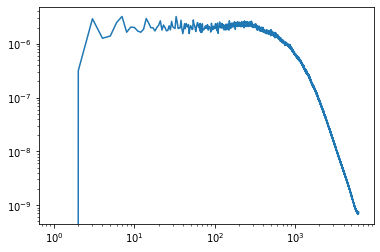

In [14]:
plt.loglog(cl[2])

In [11]:
import matplotlib.pyplot as plt